# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import pearsonr, linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Give server 10 seconds break in between each iteration
    time.sleep(10)
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | arauca
Processing Record 3 of Set 1 | mangai
Processing Record 4 of Set 1 | salinopolis
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | charters towers
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | vorkuta
Processing Record 13 of Set 1 | igarka
Processing Record 14 of Set 1 | camana
Processing Record 15 of Set 1 | jebrail
Processing Record 16 of Set 1 | hobyo
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | torata
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | launceston
Proce

Processing Record 40 of Set 4 | sao vicente
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | al jawf
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | palikir - national government center
Processing Record 45 of Set 4 | toliara
Processing Record 46 of Set 4 | pangai
Processing Record 47 of Set 4 | al ghayzah
Processing Record 48 of Set 4 | san pedro pochutla
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | alapayevsk
Processing Record 1 of Set 5 | happy valley-goose bay
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | shenjiamen
Processing Record 4 of Set 5 | konarka
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | pereiro de aguiar
Processing Record 7 of Set 5 | la'ie
Processing Record 8 of Set 5 | lospalos
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | kale
Processing Record 11 of Set 5 | samus'
Processing Record 12 of Set 5 | east

Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | hailar
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | jwaneng
Processing Record 38 of Set 8 | argo
Processing Record 39 of Set 8 | balabac
Processing Record 40 of Set 8 | mananjary
Processing Record 41 of Set 8 | marathon
Processing Record 42 of Set 8 | chehalis
Processing Record 43 of Set 8 | sassnitz
Processing Record 44 of Set 8 | garissa
Processing Record 45 of Set 8 | luwingu
Processing Record 46 of Set 8 | cromer
Processing Record 47 of Set 8 | lethem
Processing Record 48 of Set 8 | matoury
Processing Record 49 of Set 8 | ciudad melchor muzquiz
Processing Record 0 of Set 9 | mount isa
Processing Record 1 of Set 9 | urzhar
Processing Record 2 of Set 9 | barcelos
Processing Record 3 of Set 9 | mandya
Processing Record 4 of Set 9 | dryden
Processing Record 5 of Set 9 | arkalyk
Processing Record 6 of Set 9 | lembeni
Processing Record 7 of Set 9 

Processing Record 18 of Set 12 | mont-dore
Processing Record 19 of Set 12 | arkhangel'sk
Processing Record 20 of Set 12 | kargasok
Processing Record 21 of Set 12 | ust-tsilma
Processing Record 22 of Set 12 | union choco
City not found. Skipping...
Processing Record 23 of Set 12 | gueret
Processing Record 24 of Set 12 | praya
Processing Record 25 of Set 12 | homer
Processing Record 26 of Set 12 | ad dabbah
Processing Record 27 of Set 12 | sona
Processing Record 28 of Set 12 | kachug
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,14.38,88,74,1.79,AU,1693267653
1,arauca,7.0847,-70.7591,24.81,87,43,3.28,CO,1693267665
2,mangai,-4.0500,19.5333,22.32,85,100,0.53,CD,1693267676
3,salinopolis,-0.6136,-47.3561,26.72,80,0,5.23,BR,1693267671
4,thompson,55.7435,-97.8558,12.09,94,100,3.60,CA,1693267581


In [7]:
#C:\Users\osvso\OneDrive\Documentos\Personales\Bootcamp\Proyects (hw)\Module 6\python-api-challenge\output_data
# Export the City_Data into a csv 
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,14.38,88,74,1.79,AU,1693267653
1,arauca,7.0847,-70.7591,24.81,87,43,3.28,CO,1693267665
2,mangai,-4.0500,19.5333,22.32,85,100,0.53,CD,1693267676
3,salinopolis,-0.6136,-47.3561,26.72,80,0,5.23,BR,1693267671
4,thompson,55.7435,-97.8558,12.09,94,100,3.60,CA,1693267581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

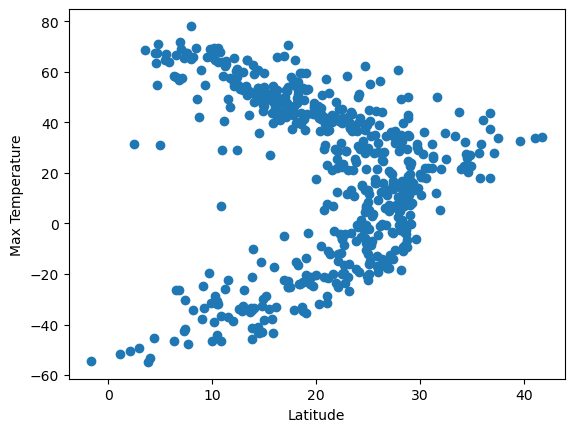

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/FigLatvsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

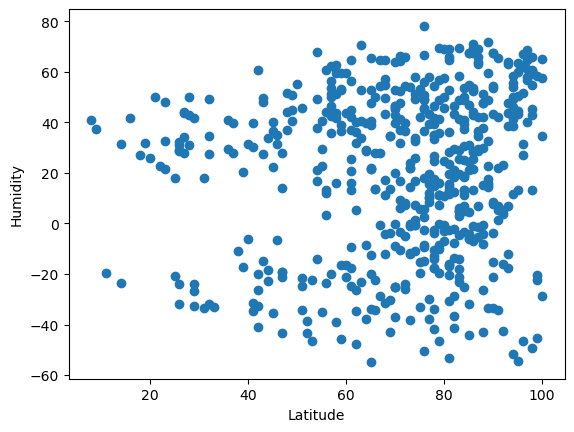

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/FigLatvsHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

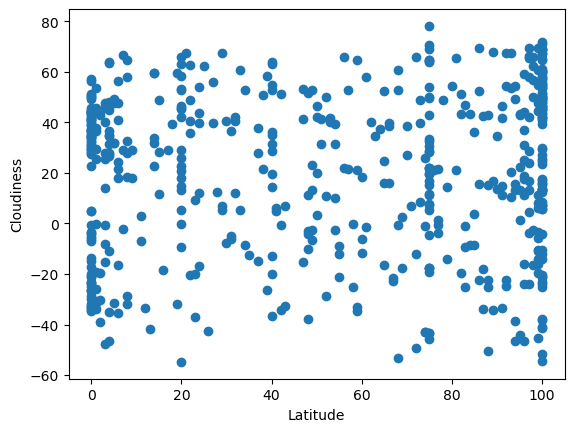

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/FigLatvsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

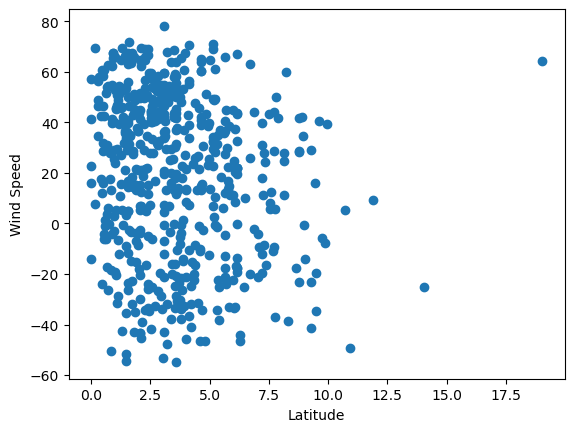

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/FigLatvsWspd.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, regress_values, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arauca,7.0847,-70.7591,24.81,87,43,3.28,CO,1693267665
4,thompson,55.7435,-97.8558,12.09,94,100,3.60,CA,1693267581
6,naze,28.3667,129.4833,26.56,81,15,5.24,JP,1693267725
7,hawaiian paradise park,19.5933,-154.9731,27.24,83,75,3.09,US,1693267727
10,vorkuta,67.5000,64.0000,4.67,90,21,1.71,RU,1693267733


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,14.38,88,74,1.79,AU,1693267653
2,mangai,-4.0500,19.5333,22.32,85,100,0.53,CD,1693267676
3,salinopolis,-0.6136,-47.3561,26.72,80,0,5.23,BR,1693267671
5,port-aux-francais,-49.3500,70.2167,3.00,98,72,10.93,TF,1693267723
8,charters towers,-20.1000,146.2667,22.43,42,0,4.33,AU,1693267728


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.704673826866481


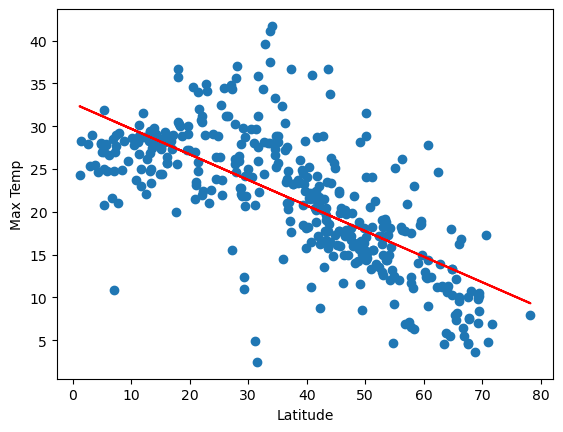

In [20]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.8296699843527036


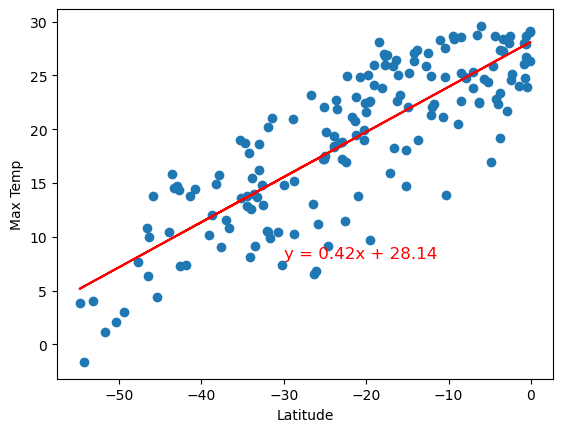

In [21]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:**
- There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.704673826866481 on Northern Hemisphere.
- There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.8296699843527036 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06746282597516015


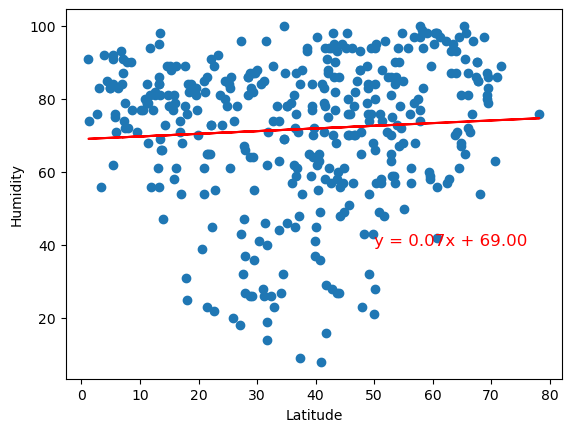

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.12510169854482092


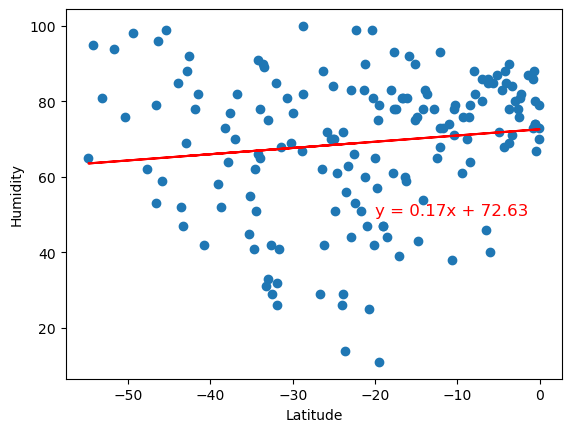

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** 
- There is a relatively strong positive correlation between humidity and latitude with a correlation coefficient of 0.06746282597516015 on Northern Hemisphere.
- There is a relatively strong positive correlation correlation between humidity and latitude with a correlation coefficient of 0.12510169854482092 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03364099935193749


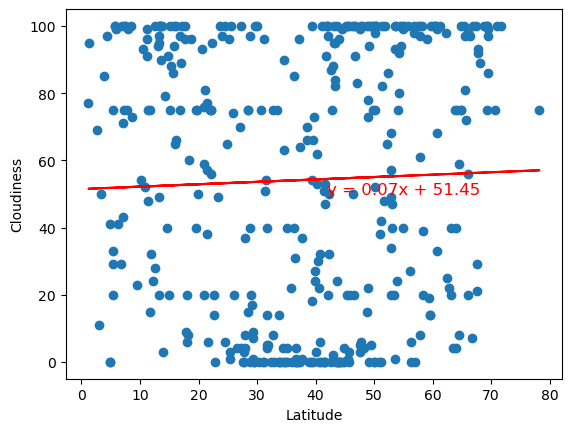

In [24]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.04026566523014607


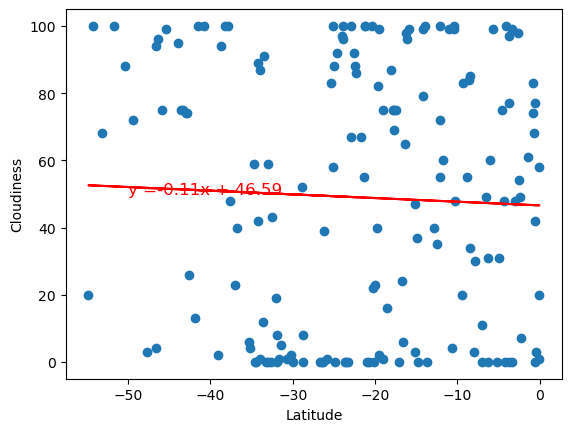

In [25]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** 
- There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.03364099935193749 on Northern Hemisphere.
- There is a relatively negative correlation between cloudiness and latitude with a correlation coefficient of -0.04026566523014607 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15449455181763813


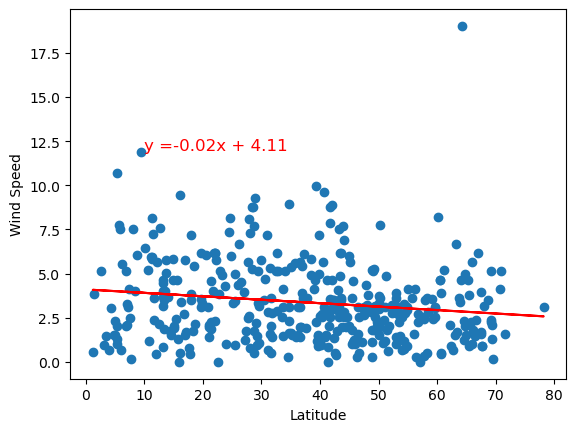

In [26]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.006269707895805302


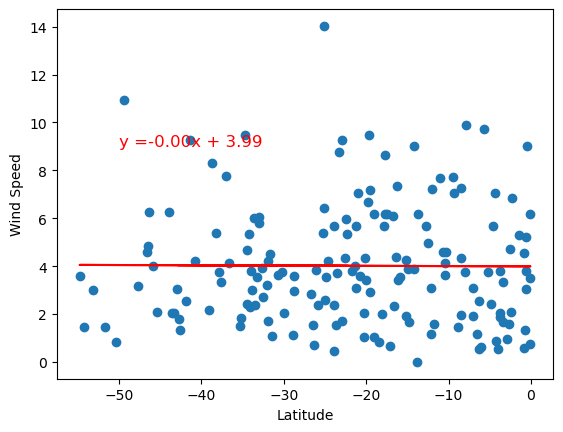

In [27]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 
- There is a negative correlation between wind speed and latitude with a correlation coefficient of -0.15449455181763813 on Northern Hemisphere.
- There is a weak negative correlation between wind speed and latitude with a correlation coefficient of -0.006269707895805302 on Southern Hemisphere.